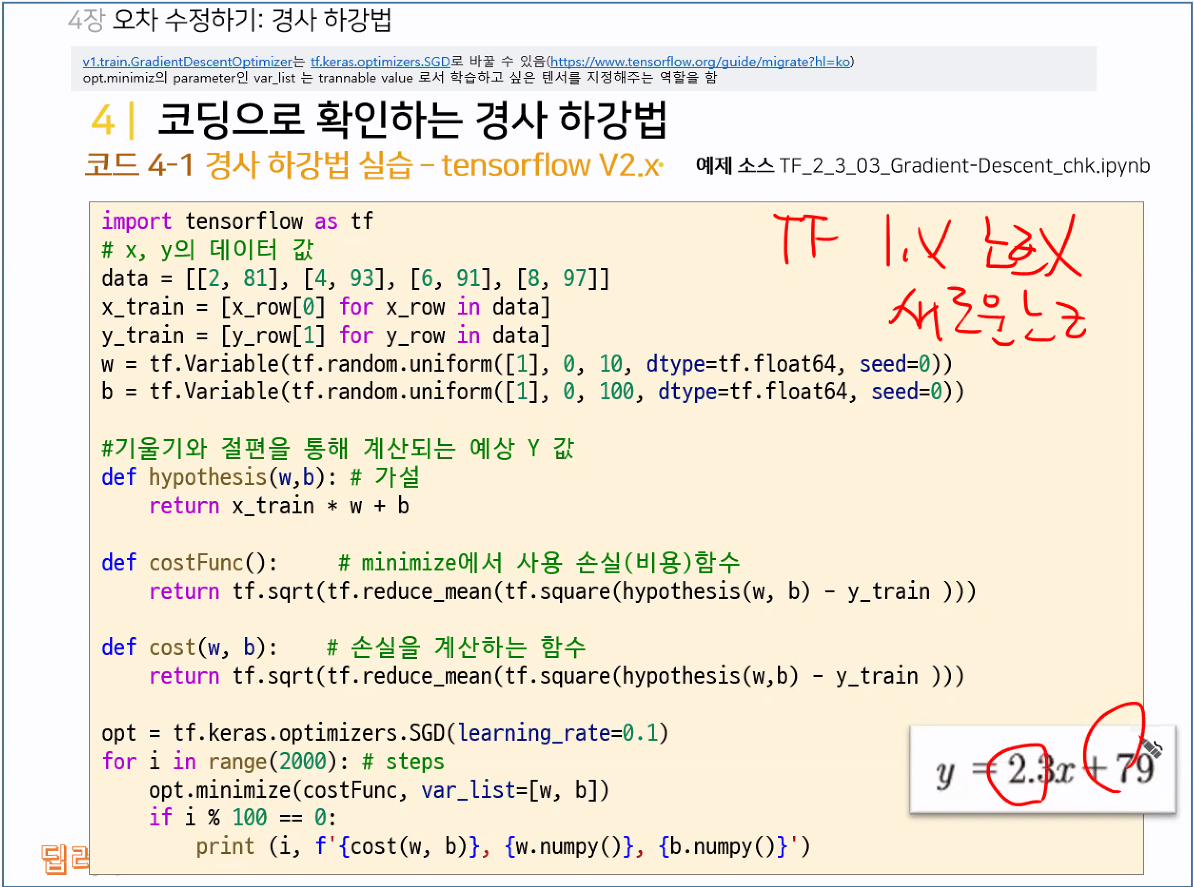

In [1]:
import tensorflow as tf

data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x_train = [x_row[0] for x_row in data]
y_train = [y_row[1] for y_row in data]
w = tf.Variable(tf.random.uniform([1], 0, 10, dtype = tf.float64, seed = 0))
b = tf.Variable(tf.random.uniform([1], 0, 100, dtype = tf.float64, seed = 0))

def hypothesis(w, b):
    return x_train * w + b

def costFunc():
    return tf.sqrt(tf.reduce_mean(tf.square(hypothesis(w, b) - y_train)))

def cost(w, b):
    return tf.sqrt(tf.reduce_mean(tf.square(hypothesis(w, b) - y_train)))

opt = tf.keras.optimizers.SGD(learning_rate = 0.1)
for i in range(2000):
    opt.minimize(costFunc, var_list =[w, b])
    if i % 100 ==0:
        print( i, f'{cost(w, b)}, {w.numpy()}, {b.numpy()}')

AttributeError: 'SGD' object has no attribute 'minimize'

버전 관련 에러로 추정

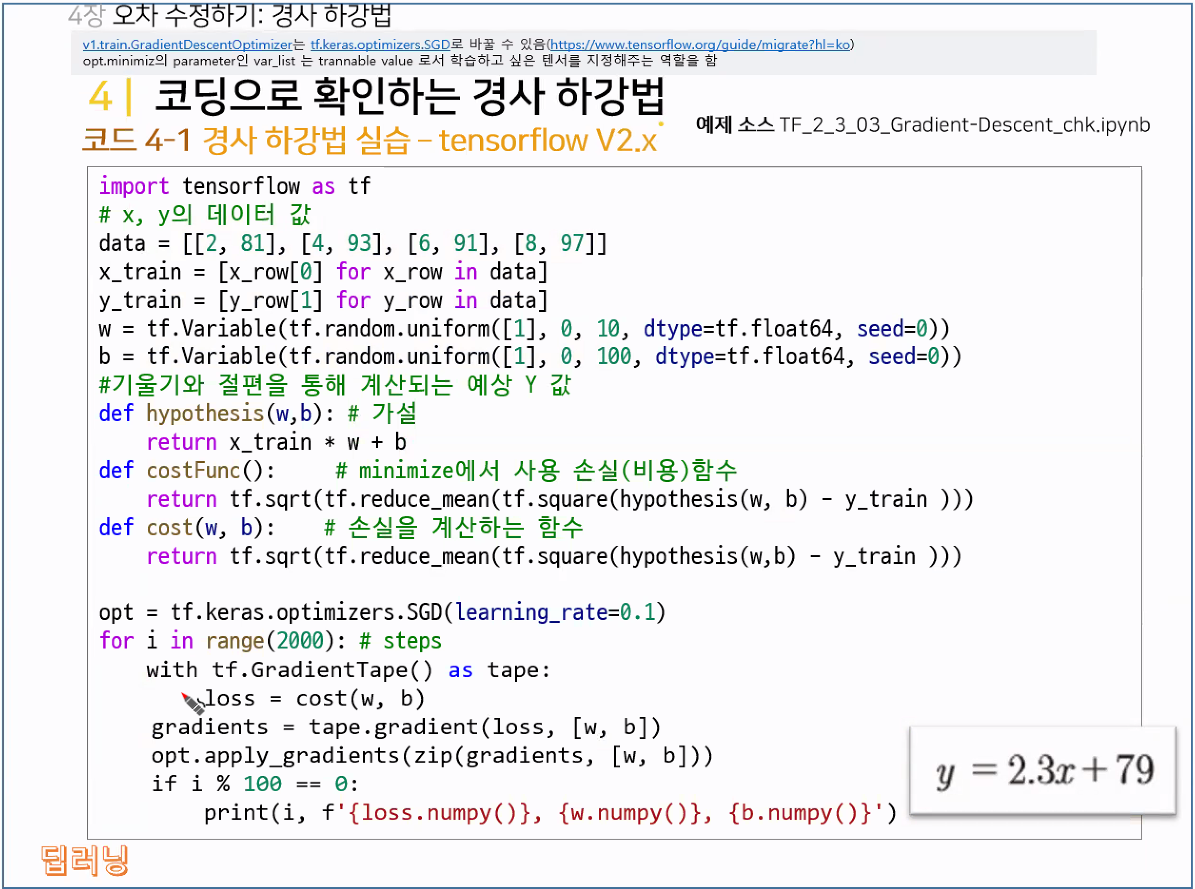

In [2]:
import tensorflow as tf

data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x_train = [x_row[0] for x_row in data]
y_train = [y_row[1] for y_row in data]
w = tf.Variable(tf.random.uniform([1], 0, 10, dtype = tf.float64, seed = 0))
b = tf.Variable(tf.random.uniform([1], 0, 100, dtype = tf.float64, seed = 0))

def hypothesis(w, b):
    return x_train * w + b

def costFunc():
    return tf.sqrt(tf.reduce_mean(tf.square(hypothesis(w, b) - y_train)))

def cost(w, b):
    return tf.sqrt(tf.reduce_mean(tf.square(hypothesis(w, b) - y_train)))

opt = tf.keras.optimizers.SGD(learning_rate = 0.1)
for i in range(2000):
    with tf.GradientTape() as tape:
        loss = cost(w, b)
    gradients = tape.gradient(loss, [w, b])
    opt.apply_gradients(zip(gradients, [w, b]))
    if i % 100 == 0:
        print( i, f'{cost(w, b)}, {w.numpy()}, {b.numpy()}')

0 23.653350728146023, [2.35816371], [55.23229736]
100 8.455418068828994, [5.56275245], [59.52928875]
200 7.059673972567049, [4.94529357], [63.21401926]
300 5.769513308376242, [4.35166005], [66.75657028]
400 4.6524623141843655, [3.79938018], [70.05234034]
500 3.800818716439034, [3.31753658], [72.92777687]
600 3.2761410213147033, [2.94021501], [75.1794706]
700 3.0268793307192388, [2.68106506], [76.72596671]
800 2.9306166127355957, [2.52045965], [77.68439107]
900 2.8973117878013976, [2.42611529], [78.24739788]
1000 2.88628749571127, [2.37186214], [78.57115749]
1100 2.8826944895629905, [2.34089463], [78.75595835]
1200 2.8815294910404647, [2.32326203], [78.86118213]
1300 2.8811523865340436, [2.31323029], [78.92104732]
1400 2.881030386229019, [2.30752439], [78.95509766]
1500 2.8809909238436453, [2.30427925], [78.97446329]
1600 2.880978160016608, [2.30243367], [78.98547692]
1700 2.880974031724183, [2.30138406], [78.99174054]
1800 2.8809726964901468, [2.30078713], [78.99530274]
1900 2.88097226